#Prosedür 1 – Bağımsız T testi
Test sonuçlarının geçerli olabilmesi için verilerin karşılaması gereken varsayımlar şunlardır:

✓ Örnekler bağımsız ve rastgele çekilir

✓ Artıkların iki grup arasındaki dağılımı normal dağılıma uygun olmalıdır

✓ İki grup arasındaki varyanslar eşittir


1- Gerekli kütüphaneleri içe aktarın ve test veri setini yükleyin.

In [2]:
import pandas as pd
from scipy import stats

df = pd.read_csv('Iris_Data.csv')

2- Veriler hakkında fikir sahibi olmak ve bazı genel tanımlayıcı istatistiklere bakmak her zaman iyi bir fikirdir.

In [3]:
df.groupby("species")['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


3- Örneğin geri kalanında kodun okunmasını biraz daha temiz hale getirmek için 2 veri çerçevesi oluşturacağız:
Her veri çerçevesinin yalnızca ilgili çiçek türüne ilişkin verileri içerdiği orijinal verilerin alt kümeleri.
Artıkların örnekte daha sonra hesaplanabilmesi için indekslerin sıfırlanması gerekir.

In [4]:
setosa = df[(df['species'] == 'Iris-setosa')]
setosa.reset_index(inplace=True)

versicolor = df[(df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace = True)

İlk olarak varyansların homojenliği kontrol edilecektir. Bunu yapmak için Levene'nin homojenlik testini kullanacağız.
scipy.stats'taki stats.levene() yöntemi olan varyans.

In [5]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.41728596812962016)

Test anlamlı değil, yani varyansların homojenliği var ve devam edebiliriz. Eğer test olsaydı
anlamlı olması için geçerli bir alternatif Welch t-testi yapmak olacaktır.

5- Sırada normallik varsayımının test edilmesi yer almaktadır. Artıkların normal dağılması gerekir. Hesaplamak için
Gruplar arasındaki artıklar, bir grubun değerlerini diğer grubun değerlerinden çıkarır.

In [6]:
diff = setosa['sepal_width'] - versicolor['sepal_width']

6- Öncelikle p-p grafiği ve histogram grafiği ile normalliği görsel olarak kontrol edelim.

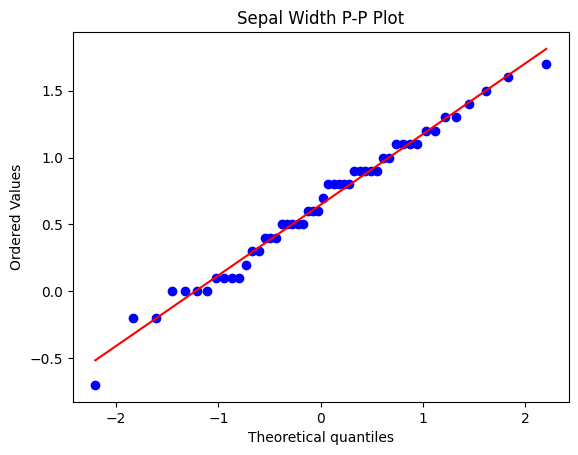

In [7]:
from scipy import stats
import matplotlib.pyplot as plt

stats.probplot(diff, plot = plt)
plt.title('Sepal Width P-P Plot')
plt.savefig('Sepal Width Residuals.png')

7- P-p grafiği verilerin normalliği koruduğunu göstermektedir. Şimdi histograma bir göz atalım.

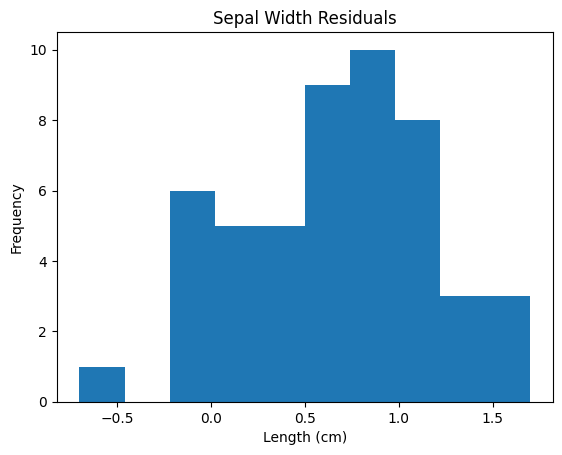

In [8]:
diff.plot(kind='hist', title = 'Sepal Width Residuals')
plt.xlabel('Length (cm)')
plt.savefig('Residual Plot of Sepal Width.png')

8- Scipy.stats kullanarak bağımsız t-testi yapmak için stats.ttest_ind() yöntemini kullanın.

In [9]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

TtestResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15, df=98.0)


9- Alternatif olarak aynı işlemler Researchpy kütüphanesi ile de yapılabilir.

In [10]:
pip install researchpy

In [11]:
import researchpy as rp

12- Researchpy'yi kullanarak (adım 2) gibi genel tanımlayıcı istatistikleri alın.

In [12]:
df.groupby('species')['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


13- .describe() yöntemine ek olarak Researchpy'nin .summary_cont() yöntemi de şu hesaplamaları yapar:
standart hata ve güven aralıkları.

In [13]:
rp.summary_cont(df.groupby('species')['sepal_width'])

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
Iris-setosa,50,3.418,0.3810,0.0539,3.3097,3.5263
Iris-versicolor,50,2.770,0.3138,0.0444,2.6808,2.8592
Iris-virginica,50,2.974,0.3225,0.0456,2.8823,3.0657


14- Researchpy kullanarak bağımsız t-testi yapmak için Researchpy.ttest() yöntemini kullanın.

In [14]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

descriptives

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,sepal_width,50.0,3.418,0.381024,0.053885,3.309714,3.526286
1,sepal_width,50.0,2.770,0.313798,0.044378,2.680820,2.859180
2,combined,100.0,3.094,0.476057,0.047606,2.999540,3.188460


15- Bu tanımlayıcı istatistik tablosu daha önce bu örnek için üretilen tablonun aynısıdır. ama, bu
yöntem, her iki veri çerçevesi için de tamamen aynı olan değişkenin sütun adını kullanır.
bu örnek, tablonun daha önce üretilen tablo kadar temiz olmamasına neden oluyor. Şimdi sonuç tablosuna bakalım.

In [15]:
results

,Independent t-test,results
0,Difference (sepal_width - sepal_width) =,0.6480
1,Degrees of freedom =,98.0000
2,t =,9.2828
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.8566
7,Hedge's g =,1.8423
8,Glass's delta1 =,1.7007
9,Point-Biserial r =,0.6840


##Prosedür 2 – Eşleştirilmiş Örnek T-testi
Eşleştirilmiş örnek t-testine aynı zamanda bağımlı örnek t-testi de denir. anlamlı olup olmadığını test eden tek değişkenli bir testtir.

2 ilgili değişken arasındaki fark.
Bu prosedürde kullanılan veriler hayalidir ve kan basıncı ölçümlerini içerir.
araya girmek. Bunlar “bp_before” ve “bp_after” değişkenleridir.

1- Pandaları pd olarak veri olarak içe aktaralım ve ardından verilere bir göz atalım!

In [16]:
import pandas as pd

df = pd.read_csv('blood_pressure.csv')

df[['bp_before', 'bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


2- Yapmamız gereken ilk şey istatistik kütüphanesini içe aktarmak ve ardından eşleştirilmiş örneklerin varsayımlarını test etmektir.

t-testi. Öncelikle değişkenlerin her birinde anlamlı aykırı değerler olup olmadığını kontrol edelim.

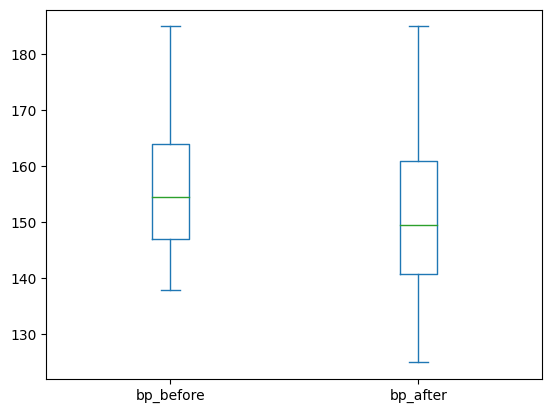

In [17]:
from scipy import stats
import matplotlib.pyplot as plt

df[['bp_before', 'bp_after']].plot(kind='box')

plt.savefig('boxplot_outliers.png')
plt.show()

Değişkenlerde anlamlı bir aykırı değer yok gibi görünüyor.

3- Bağımlı örneklem T testi, ikisi arasındaki farklar üzerinde normallik kontrolünün yapılması gerekir
puanlar. Bu varsayımı test etmenin birkaç yolu vardır; bir histogram yapın, bir Q-Q grafiği kullanın ve/veya bir
istatistiksel test. Farklılıklar için bir değişken oluşturalım ve bunların üzerinden geçelim.

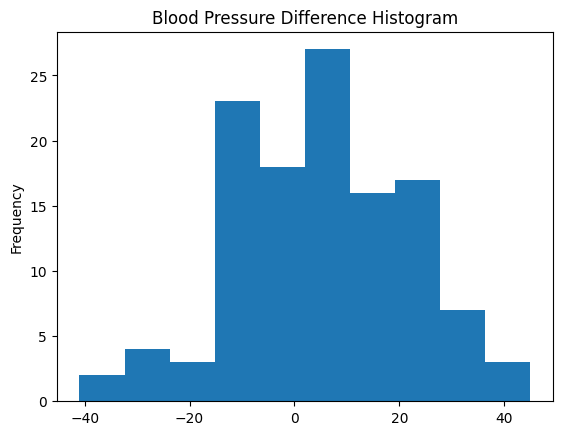

In [19]:
df['bp_difference'] = df['bp_before'] - df['bp_after']

df['bp_difference'].plot(kind='hist', title ='Blood Pressure Difference Histogram')

plt.savefig('blood pressure difference histogram.png')
plt.show()

Verilerimizin histogramı normal dağılmış görünmektedir.

4- Normal dağılım gösteren verileri kontrol etmenin başka bir yolu da Q-Q grafiği kullanmaktır. Veriler kırmızı renkte olmalıdır
astar. Değilse, verilerin normal şekilde dağılmayabileceği anlamına gelir.

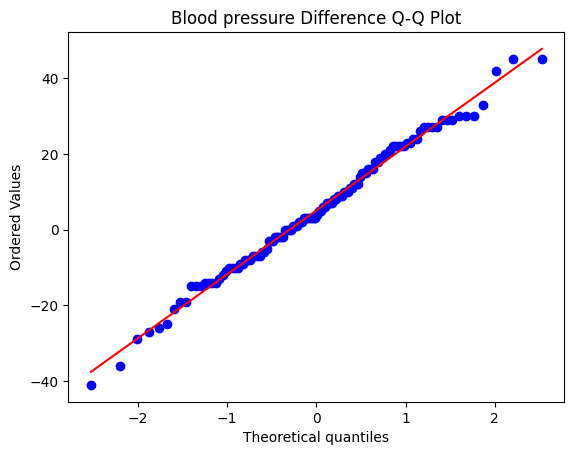

In [20]:
stats.probplot(df['bp_difference'], plot=plt)
plt.title('Blood pressure Difference Q-Q Plot')
plt.savefig('blood pressure difference qq plot.png')
plt.show()

Normallikten biraz sapma var ama çok ciddi görünmüyor bu yüzden endişelenmeye gerek yok.

5- Emin olmak için verilerin normal dağılıp dağılmadığını istatistiksel olarak test edelim. Bunu test etmek için şunu kullanabilirsiniz:
Normallik için Shapiro-Wilk testi. Ne yazık ki çıktı etiketlenmemiş. İlk değer W test değeridir,
ve ikinci değer p-değeridir.

In [21]:
stats.shapiro(df['bp_difference'])

ShapiroResult(statistic=0.9926842451095581, pvalue=0.7841846942901611)

Test anlamlı değildi. Bu nedenle iki durum arasındaki fark normal dağılıma sahiptir.

6- Artık verilerin normal dağıldığını bildiğimiz için t-testi yaparak tıbbi verilerin normal dağılıp dağılmadığını öğrenebiliriz.
Tedavinin kan basıncı üzerinde etkisi vardır.

In [22]:
from scipy.stats import ttest_rel

ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

In [23]:
import pandas as pd
import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt

df = pd.read_csv('difficile.csv')
df.drop('person', axis=1, inplace= True)

2- Şimdi sayısaldan stringe kadar olan değerleri kaydedip özet istatistikleri alalım.

In [24]:
df['dose'].replace({1:'placebo', 2:'low', 3:'high'}, inplace=True)

rp.summary_cont(df['libido'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,libido,15.0,3.4667,1.7674,0.4563,2.4879,4.4454


3- Veriyi bir bütün olarak görmek güzel ama biz gerçekten veriyi dozlayarak ilgileniyoruz.

In [25]:
rp.summary_cont(df['libido'].groupby(df['dose']))

,N,Mean,SD,SE,95% Conf.,Interval
dose,,,,,,
high,5,5.0,1.5811,0.7071,3.0368,6.9632
low,5,3.2,1.3038,0.5831,1.5811,4.8189
placebo,5,2.2,1.3038,0.5831,0.5811,3.8189


4- ANOVA testi gerçekleştirmek için bunu Python ile yapmanın birkaç yolu vardır. Biri onunla
scipy.stats kütüphanesinden ayrı olan stats.f_oneway() yöntemi, diğeri ise statsmodels'i kullanıyor.

In [26]:
stats.f_oneway(df['libido'] [df['dose'] == 'high'],
               df['libido'] [df['dose'] == 'low'],
               df['libido'] [df['dose'] == 'placebo'])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

F istatistiği= 5,119 ve p-değeri= 0,025, bu da genel olarak anlamlı bir etkinin olduğunu gösterir.
Libidoya karşı ilaç.

5- Gruplar arasında test yapmak için tüm grupları karşılaştırabileceğimiz bazı post-hoc testler yapmamız gerekiyor.
birbirine göre. Bu yöntemle hala bazı yararlı bilgileri kaçırıyoruz, bir ANOVA tablosuna ihtiyacımız var.

In [27]:
results = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


Bu ANOVA tablosunu parçalayalım. Doz sırası, genel olan gruplar arası etkidir.
deneysel etki. Modelin karelerinin toplamı (SSM; tabloda 20,133 değeri) varyansın ne kadar olduğunu gösterir
modelimiz tarafından açıklanmaktadır. Mevcut model önemli miktarda varyansı açıklıyor, F(2,12)= 5.12, p <
0.05. Artık satır, verilerdeki sistematik olmayan varyasyondur (SSR; açıklanamayan varyans olarak da adlandırılır;
Tablodaki değer 23.600). Bu durumda sistematik olmayan varyasyon doğal bireyi temsil eder.
libidodaki farklılıklar ve Difficile ilacına verilen doğal farklı reaksiyonlar.